In [1]:
import cv2, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # ignore tensorflow warning

import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

from datetime import datetime
from IPython.display import clear_output
from typing import Tuple, List, Union, Optional

from models.SSDCAE import SSDCAE
from models.MobileNetDecoder import MobileNetDecoder
from utils.image_handler import *

In [2]:
model = SSDCAE(
    filters=(32, 64, 64, 32),
    pre_filters=(32, 64, 64, 64),
    shape=(128, 128, 3),
    dropout=.2,
    use_prelu=True
)
model.build((None, 128, 128, 3))
model.compile(optimizer=Adam(lr=1e-3), loss='mse', metrics=['accuracy'])
model.load_weights('saved_models/76acc_4layers_2048vt_300ep_subpixel/weights.271-0.76.hdf5')
model.predict(np.random.rand(1, 128, 128, 3))
#tf.saved_model.save(model, "ssdcae", signatures=model.call.get_concrete_function(
#         [
#             tf.TensorSpec(shape=[None, None, None, None], dtype=tf.int32, name='input'), 
#         ]))
#
encoder, decoder = model.layers
model.save('./saved_models/ssdcae/ssdcae', save_format='tf')
encoder.save('./saved_models/ssdcae/encoder', save_format='tf')
decoder.save('./saved_models/ssdcae/decoder', save_format='tf')
#tf.keras.utils.plot_model(
#    model, 
#    to_file='./imgs/ssdcae.png', 
#    show_layer_names=True,
#    expand_nested=True,
#    dpi=96,
#    show_shapes=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ./saved_models/ssdcae/ssdcae/assets
INFO:tensorflow:Assets written to: ./saved_models/ssdcae/encoder/assets
INFO:tensorflow:Assets written to: ./saved_models/ssdcae/decoder/assets


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


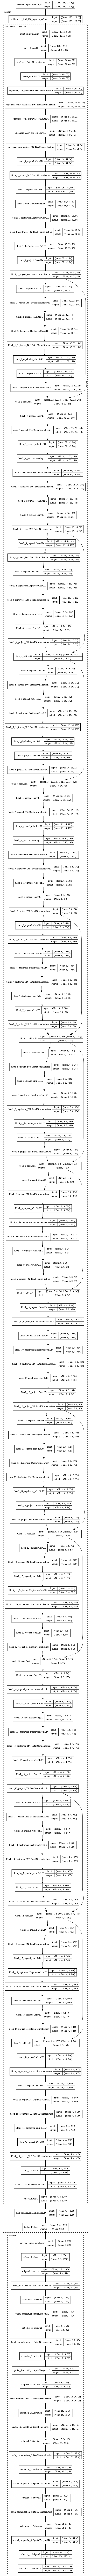

In [2]:
model = MobileNetDecoder(shape=(128, 128, 3))
model = tf.keras.Sequential(model.layers)
tf.keras.utils.plot_model(
    model, 
    to_file='./imgs/mobilenet_decoder.png', 
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    show_shapes=True)